# Customising static orbit plots

The default styling for plots works pretty well however sometimes you may need to change things. The following will show you how to change the style of your plots and have different types of lines and dots

This is the default plot we will start with:

In [1]:
from astropy.time import Time
import matplotlib.pyplot as plt

plt.ion()
from poliastro.plotting.static import StaticOrbitPlotter

from poliastro.bodies import Earth, Mars, Jupiter, Sun
from poliastro.twobody import Orbit

/home/juanlu/Development/poliastro/poliastro-library/src/poliastro/twobody/propagation.py:230: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



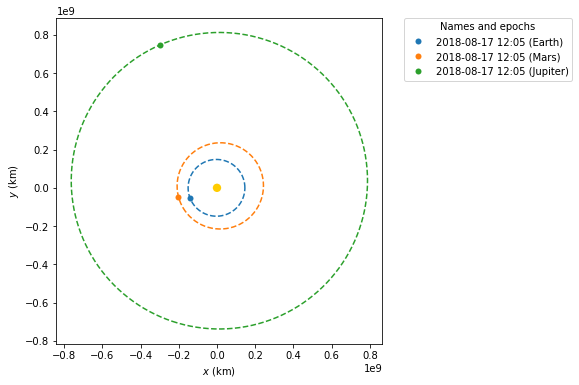

In [2]:
epoch = Time("2018-08-17 12:05:50", scale="tdb")

plotter = StaticOrbitPlotter()
plotter.plot(Orbit.from_body_ephem(Earth, epoch), label="Earth")
plotter.plot(Orbit.from_body_ephem(Mars, epoch), label="Mars")
plotter.plot(Orbit.from_body_ephem(Jupiter, epoch), label="Jupiter");

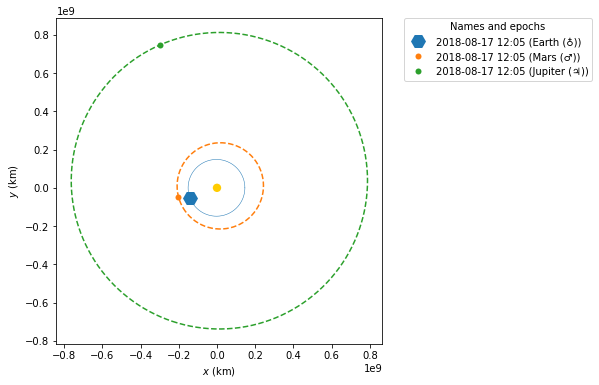

In [3]:
epoch = Time("2018-08-17 12:05:50", scale="tdb")

plotter = StaticOrbitPlotter()
earth_plots = plotter.plot(Orbit.from_body_ephem(Earth, epoch), label=Earth)

earth_plots[0].set_linestyle("-")  # solid line
earth_plots[0].set_linewidth(0.5)
earth_plots[1].set_marker("H")  # Hexagon
earth_plots[1].set_markersize(15)

mars_plots = plotter.plot(Orbit.from_body_ephem(Mars, epoch), label=Mars)
jupiter_plots = plotter.plot(Orbit.from_body_ephem(Jupiter, epoch), label=Jupiter)

Here we get hold of the lines list from the `OrbitPlotter.plot` method this is a list of lines. The first is the orbit line. The second is the current position marker. With the matplotlib lines objects we can start changing the style. First we make the line solid but thin line. Then we change the current position marker to a large hexagon.

More details of the style options for the markers can be found here: https://matplotlib.org/2.0.2/api/markers_api.html#module-matplotlib.markers
More details of the style options on lines can be found here: https://matplotlib.org/2.0.2/api/lines_api.html However make sure that you use the set methods rather than just changing the attributes as the methods will force a re-draw of the plot.

Next we will make some changes to the other two orbits.

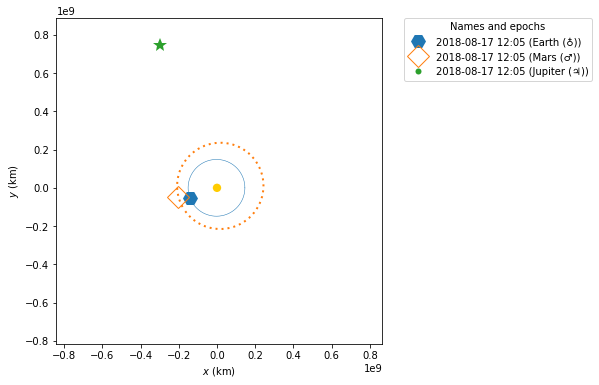

In [4]:
epoch = Time("2018-08-17 12:05:50", scale="tdb")

plotter = StaticOrbitPlotter()

earth_plots = plotter.plot(Orbit.from_body_ephem(Earth, epoch), label=Earth)
earth_plots[0].set_linestyle("-")  # solid line
earth_plots[0].set_linewidth(0.5)
earth_plots[1].set_marker("H")  # Hexagon
earth_plots[1].set_markersize(15)

mars_plots = plotter.plot(Orbit.from_body_ephem(Mars, epoch), label=Mars)
mars_plots[0].set_dashes([0, 1, 0, 1, 1, 0])
mars_plots[0].set_linewidth(2)
mars_plots[1].set_marker("D")  # Diamond
mars_plots[1].set_markersize(15)
mars_plots[1].set_fillstyle("none")
# make sure this is set if you use fillstyle 'none'
mars_plots[1].set_markeredgewidth(1)

jupiter_plots = plotter.plot(Orbit.from_body_ephem(Jupiter, epoch), label=Jupiter)
jupiter_plots[0].set_linestyle("")  # No line
jupiter_plots[1].set_marker("*")  # star
jupiter_plots[1].set_markersize(15)

You can also change the style of the plot using the matplotlib axis which can be aquired from the OrbitPlotter()

See the folling example that creates a grid, adds a title, and makes the background transparent. To make the changes clearer it goes back to the inital example.

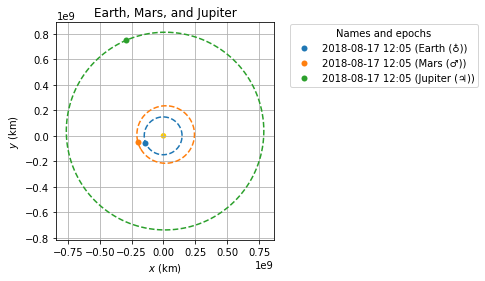

In [5]:
epoch = Time("2018-08-17 12:05:50", scale="tdb")

fig, ax = plt.subplots()

ax.grid(True)
ax.set_title("Earth, Mars, and Jupiter")
ax.set_facecolor("None")

plotter = StaticOrbitPlotter(ax)

plotter.plot(Orbit.from_body_ephem(Earth, epoch), label=Earth)
plotter.plot(Orbit.from_body_ephem(Mars, epoch), label=Mars)
plotter.plot(Orbit.from_body_ephem(Jupiter, epoch), label=Jupiter)